In [ ]:
# Import pandas and numpy first to work with data/dataframes
import pandas as pd
import numpy as np

In [ ]:
# Read in data from previous pull
census_data = pd.read_csv("Income Prediction Data ACS 2022 5-Year Raw.csv")

In [ ]:
# Display dataframe
census_data.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Some College >1 Year,Associate's Degree,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate,Median Income,Population Below Poverty Line,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,5864,3495,6726,4014,702,437,68315,6630,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,24237,16046,33474,15077,3483,2351,71039,23445,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,2440,1397,1167,640,188,105,39712,5280,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,2278,1269,1047,507,109,76,50669,4297,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,4964,4493,3840,1751,270,156,57440,8277,1,9


It dislays correctly, which is good! Now to pull and add further income data and the total count of disabled persons for each county as another demographic factor to test.

In [ ]:
# Install census and us libraries again, will display as incorrect if repeated
pip install census us

SyntaxError: invalid syntax (<ipython-input-17-83883083e611>, line 2)

In [ ]:
# add imports from each
from census import Census
from us import states

In [ ]:
# API key
api_key = "f526685ee03b62e1093a9f690970ffd359563fa1"

In [ ]:
# Initialize Census
c = Census(api_key)

In [ ]:
# Pull data from the subject tables for the 5-year dataset
dataset3 = c.acs5st

In [ ]:
# Thought to add disability as a demographic, plus household income percentages.
variables3 = ("NAME","S1810_C02_001E", # NAME, Disabled Population
              "S1901_C01_002E", # Total 2022 Households Income <$10,000
              "S1901_C01_003E", # Total 2022 Households Income $10,000 to $14,999
              "S1901_C01_004E", # Total 2022 Households with Income $15,000 to $24,999
              "S1901_C01_005E", # Total 2022 Households with Income $25,000 to $34,999
              "S1901_C01_006E", # Total 2022 Households with Income $35,000 to $49,999
              "S1901_C01_007E", # Total 2022 Households with Income $50,000 to $74,999
              "S1901_C01_008E", # Total 2022 Households with Income $75,000 to $99,999
              "S1901_C01_009E", # Total 2022 Households with Income $100,000 to $149,999
              "S1901_C01_010E", # Total 2022 Households with Income $150,000 to $199,999
              "S1901_C01_011E") # Total 2022 Households with Income $200,000 or More
# Initalize labels for each
labels3 = ("NAME", "Disabled Population", "Income >10,000", "Income 10-14,999", "Income 15-24,999",
           "Income 35-49,999", "Income 50-74,999", "Income 75-99,999", "Income 100-149,999",
           "Income 150-199,999", "Income >200")
# list to store data
data3 = []
# For loop, note the states.STATES to pull data for each state + puerto rico
for state in states.STATES:
  r = dataset3.get(variables3, {'for': 'county:*'})
  df3 = pd.DataFrame(r).rename(columns = {v: 1 for v in zip(variables3, labels3)})
  data3.append(df3)

In [ ]:
# Add raw data print from data3, displaying as a list
print(data3)

[                                  NAME  S1810_C02_001E  S1901_C01_002E  \
0              Autauga County, Alabama          9425.0             4.4   
1              Baldwin County, Alabama         31878.0             4.5   
2              Barbour County, Alabama          3970.0            10.2   
3                 Bibb County, Alabama          4097.0             7.6   
4               Blount County, Alabama          9948.0             6.7   
...                                ...             ...             ...   
3217  Vega Baja Municipio, Puerto Rico         11768.0            21.0   
3218    Vieques Municipio, Puerto Rico          1021.0            23.2   
3219   Villalba Municipio, Puerto Rico          4916.0            22.8   
3220    Yabucoa Municipio, Puerto Rico          3645.0            23.6   
3221      Yauco Municipio, Puerto Rico         10283.0            26.0   

      S1901_C01_003E  S1901_C01_004E  S1901_C01_005E  S1901_C01_006E  \
0                2.9            10.6  

In [ ]:
# Rename the columns, the labels didn't append again. A problem for the subject tables specifically it seems
df3 = df3.rename(columns = {'S1810_C02_001E': 'Disabled Population', 'S1901_C01_002E':'Total Income <10k', 'S1901_C01_003E':'Total Income 10k-15k',
                            'S1901_C01_004E':'Total Income 15k-25k', 'S1901_C01_005E':'Total Income 25k-35k', 'S1901_C01_006E':'Total Income 35k-50k',
                            'S1901_C01_007E': 'Total Income 50k-75k', 'S1901_C01_008E': 'Total Income 75k-100k', 'S1901_C01_009E': 'Total Income 100k-150k',
                            'S1901_C01_010E': 'Total Income 150k-200k', 'S1901_C01_011E': 'Total Income >200k'})

In [ ]:
# Display renamed heads
df3.head()

,NAME,Disabled Population,Total Income <10k,Total Income 10k-15k,Total Income 15k-25k,Total Income 25k-35k,Total Income 35k-50k,Total Income 50k-75k,Total Income 75k-100k,Total Income 100k-150k,Total Income 150k-200k,Total Income >200k,state,county
0,"Autauga County, Alabama",9425.0,4.4,2.9,10.6,7.0,12.2,16.4,14.5,17.8,6.8,7.4,01,001
1,"Baldwin County, Alabama",31878.0,4.5,4.2,7.0,8.1,12.1,16.0,14.4,17.0,7.5,9.1,01,003
2,"Barbour County, Alabama",3970.0,10.2,8.2,16.3,11.0,13.2,15.4,8.3,10.9,2.8,3.8,01,005
3,"Bibb County, Alabama",4097.0,7.6,9.1,10.9,10.5,11.2,17.0,14.8,12.3,3.0,3.5,01,007
4,"Blount County, Alabama",9948.0,6.7,5.2,8.5,9.7,14.2,16.4,12.9,15.3,6.4,4.9,01,009


In [ ]:
# Now to append this new dataframe to the existing table and create the full set of raw data
df4 = df3.copy()
df4 = df4.drop(columns = ['state', 'county'])

In [ ]:
# Display dropped columns
df4.head()

,NAME,Disabled Population,Total Income <10k,Total Income 10k-15k,Total Income 15k-25k,Total Income 25k-35k,Total Income 35k-50k,Total Income 50k-75k,Total Income 75k-100k,Total Income 100k-150k,Total Income 150k-200k,Total Income >200k
0,"Autauga County, Alabama",9425.0,4.4,2.9,10.6,7.0,12.2,16.4,14.5,17.8,6.8,7.4
1,"Baldwin County, Alabama",31878.0,4.5,4.2,7.0,8.1,12.1,16.0,14.4,17.0,7.5,9.1
2,"Barbour County, Alabama",3970.0,10.2,8.2,16.3,11.0,13.2,15.4,8.3,10.9,2.8,3.8
3,"Bibb County, Alabama",4097.0,7.6,9.1,10.9,10.5,11.2,17.0,14.8,12.3,3.0,3.5
4,"Blount County, Alabama",9948.0,6.7,5.2,8.5,9.7,14.2,16.4,12.9,15.3,6.4,4.9


In [ ]:
# Merge dataframes together
acs_raw = census_data.copy()

acs_raw = pd.merge(acs_raw, df4, on = 'NAME')

In [ ]:
# Check results
acs_raw.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Total Income <10k,Total Income 10k-15k,Total Income 15k-25k,Total Income 25k-35k,Total Income 35k-50k,Total Income 50k-75k,Total Income 75k-100k,Total Income 100k-150k,Total Income 150k-200k,Total Income >200k
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,4.4,2.9,10.6,7.0,12.2,16.4,14.5,17.8,6.8,7.4
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,4.5,4.2,7.0,8.1,12.1,16.0,14.4,17.0,7.5,9.1
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,10.2,8.2,16.3,11.0,13.2,15.4,8.3,10.9,2.8,3.8
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,7.6,9.1,10.9,10.5,11.2,17.0,14.8,12.3,3.0,3.5
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,6.7,5.2,8.5,9.7,14.2,16.4,12.9,15.3,6.4,4.9


In [ ]:
# As before, need to reorder columns so that state/county codes are at the end
acs_raw.columns

Index(['NAME', 'Median Age by Sex', 'Total Population', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races',
       'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year', 'Associate's Degree',
       'Bachelor's Degree', 'Master's Degree', 'Professional School Degree',
       'Doctorate', 'Median Income', 'Population Below Poverty Line', 'state',
       'county', 'Disabled Population', 'Total Income <10k',
       'Total Income 10k-15k', 'Total Income 15k-25k', 'Total Income 25k-35k',
       'Total Income 35k-50k', 'Total Income 50k-75k', 'Total Income 75k-100k',
       'Total Income 100k-150k', 'Total Income 150k-200k',
       'Total Income >200k'],
      dtype='object')

In [ ]:
acs_raw = acs_raw[['NAME', "Median Age by Sex", "Total Population", "White", "Black/African American",
          "American Indian/Alaskan", "Asian", "Hawaiian/Pacific Islander",
          "Some Other Race", "Two or More Races", "Male", "Female",
          "Never Married", "Now Married", "Widowed", "Divorced",
          "12th Grade, No Diploma", "High School Diploma", "GED", "Some College <1 Year",
          "Some College >1 Year", "Associate's Degree", "Bachelor's Degree", "Master's Degree",
          "Professional School Degree", "Doctorate", "Median Income", "Population Below Poverty Line",
           "Disabled Population", "Total Income <10k", "Total Income 10k-15k",
                   "Total Income 15k-25k", "Total Income 25k-35k", "Total Income 35k-50k",
                   "Total Income 50k-75k", "Total Income 75k-100k", "Total Income 100k-150k",
                   "Total Income 150k-200k", "Total Income >200k", "state", "county"]]

In [ ]:
# Display results
acs_raw.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Total Income 15k-25k,Total Income 25k-35k,Total Income 35k-50k,Total Income 50k-75k,Total Income 75k-100k,Total Income 100k-150k,Total Income 150k-200k,Total Income >200k,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,10.6,7.0,12.2,16.4,14.5,17.8,6.8,7.4,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,7.0,8.1,12.1,16.0,14.4,17.0,7.5,9.1,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,16.3,11.0,13.2,15.4,8.3,10.9,2.8,3.8,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,10.9,10.5,11.2,17.0,14.8,12.3,3.0,3.5,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,8.5,9.7,14.2,16.4,12.9,15.3,6.4,4.9,1,9


In [ ]:
# Great! However, going to go back and add percentages onto the income columns for clarity
# Because the income data is only reported in percentages of the population in those income brackets
acs_raw = acs_raw.rename(columns = {"Total Income <10k":"Total Income 10k(%)", "Total Income 10k-15k":"Total Income 10k-15k(%)",
                   "Total Income 15k-25k":"Total Income 15k-25k(%)", "Total Income 25k-35k":"Total Income 25k-35k(%)",
                                    "Total Income 35k-50k":"Total Income 35k-50(%)",
                   "Total Income 50k-75k":"Total Income 50k-75k(%)", "Total Income 75k-100k":"Total Income 75k-100k(%)",
                                    "Total Income 100k-150k":"Total Income 100k-150k(%)",
                   "Total Income 150k-200k":"Total Income 150k-200k(%)", "Total Income >200k":"Total Income >200k(%)"})

In [ ]:
# Display results
acs_raw.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Total Income 15k-25k(%),Total Income 25k-35k(%),Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,10.6,7.0,12.2,16.4,14.5,17.8,6.8,7.4,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,7.0,8.1,12.1,16.0,14.4,17.0,7.5,9.1,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,16.3,11.0,13.2,15.4,8.3,10.9,2.8,3.8,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,10.9,10.5,11.2,17.0,14.8,12.3,3.0,3.5,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,8.5,9.7,14.2,16.4,12.9,15.3,6.4,4.9,1,9


In [ ]:
# Great! Now I'm going to do some feature engineering and add on at least 3 categorical columns for association rule mining later
# I'll start with designating 'high', 'medium', and 'low' income counties based on median income
# But first, that means I have to check the distribution of median incomes in each county

# As well as check NA values

In [ ]:
acs_raw.isna().sum()

,0
NAME,0
Median Age by Sex,0
Total Population,0
White,0
Black/African American,0
American Indian/Alaskan,0
Asian,0
Hawaiian/Pacific Islander,0
Some Other Race,0
Two or More Races,0


In [ ]:
# However, first going to also download a copy of this raw data for posterity
acs_raw.to_csv("ACS_Full_Raw.csv")

In [ ]:
# Good news, the ACS only puts out clean data. The check was to ensure nothing went wrong on my end.
# Now for feature/engineering/description/visuals

In [ ]:
acs_raw['Median Income'].describe()

,Median Income
count,3.222000e+03
mean,-1.446033e+05
std,1.174592e+07
min,-6.666667e+08
25%,5.181475e+04
50%,6.045850e+04
75%,7.037625e+04
max,1.704630e+05


In [ ]:
# The description for median income is concerning, the min shouldn't be negative at all.
# Check for values below 0
acs_raw.loc[acs_raw['Median Income'] < 0]

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Total Income 15k-25k(%),Total Income 25k-35k(%),Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),state,county
2675,"Loving County, Texas",31.9,96,91,0,0,5,0,0,0,...,5.0,0.0,47.5,0.0,0.0,27.5,5.0,2.5,48,301


In [ ]:
acs_raw.iloc[2675]

,2675
NAME,"Loving County, Texas"
Median Age by Sex,31.9
Total Population,96
White,91
Black/African American,0
American Indian/Alaskan,0
Asian,5
Hawaiian/Pacific Islander,0
Some Other Race,0
Two or More Races,0


Looking at the ACS data, Loving County, despite being very real, has no reported values for most ACS data. I'll check all columns for negatives, because it seems like the API defaults to -666666 for integer reasons for NA values.

In [ ]:
acs_raw.describe()

,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,Male,...,Total Income 15k-25k(%),Total Income 25k-35k(%),Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),state,county
count,3222.000000,3.222000e+03,3.222000e+03,3.222000e+03,3222.000000,3.222000e+03,3222.000000,3.222000e+03,3.222000e+03,3.222000e+03,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,41.655897,1.037771e+05,6.814055e+04,1.290346e+04,866.386406,5.933977e+03,194.022967,6.457126e+03,9.281623e+03,5.144381e+04,...,9.380074,9.206580,12.572564,17.526040,12.897796,15.264153,6.279950,5.865953,31.274674,103.216325
std,5.340925,3.299494e+05,1.709449e+05,5.471805e+04,3941.621594,4.250878e+04,2121.372526,4.973947e+04,4.325676e+04,1.633377e+05,...,3.623022,2.724216,2.976012,3.199492,2.934875,4.423263,3.000729,4.658445,16.285065,106.560811
min,21.600000,5.000000e+01,1.900000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.400000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,38.700000,1.103975e+04,8.292750e+03,1.122500e+02,23.000000,3.100000e+01,0.000000,9.125000e+01,4.262500e+02,5.555250e+03,...,7.000000,7.400000,10.900000,15.900000,11.600000,12.600000,4.200000,3.100000,19.000000,35.000000
50%,41.400000,2.591000e+04,2.047700e+04,8.300000e+02,95.000000,1.365000e+02,3.000000,3.745000e+02,1.191000e+03,1.302450e+04,...,8.900000,9.000000,12.600000,17.700000,13.100000,15.500000,5.900000,4.600000,30.000000,79.000000
75%,44.500000,6.737050e+04,5.479525e+04,5.352750e+03,380.000000,7.517500e+02,39.000000,1.675750e+03,4.250500e+03,3.380425e+04,...,11.200000,10.800000,14.100000,19.300000,14.600000,18.200000,7.900000,7.000000,46.000000,133.000000
max,68.300000,9.936690e+06,3.937901e+06,1.189365e+06,111096.000000,1.473634e+06,101542.000000,2.253956e+06,1.355710e+06,4.937101e+06,...,33.600000,24.000000,60.500000,40.600000,43.800000,33.000000,20.400000,40.300000,72.000000,840.000000


In [ ]:
acs_raw.min()

,0
NAME,"Abbeville County, South Carolina"
Median Age by Sex,21.6
Total Population,50
White,19
Black/African American,0
American Indian/Alaskan,0
Asian,0
Hawaiian/Pacific Islander,0
Some Other Race,0
Two or More Races,0


It seems like only Loving County is a negative outlier. It would be a shame to lose any data, so a substitution/estimation will likely have to be made. Because this is the official Census Bureau's data, Loving County has no other official data I can find. It makes sense it wouldn't be reported, because Loving county is an unincorporated county with a population of 64, according to its Census Bureau profile. However, another nonprofit census reporting organization, Census Reporter, which analyzes data from the ACS, used the income tables for Loving County to report a median income of $44,821. So, I'll use that figure as an estimate for Loving's missing data.

In [ ]:
# Insert 44,821 value into Loving County's Median Income with iloc
acs_raw.loc[2675, 'Median Income'] = 44821

In [ ]:
# Recheck minimums to ensure success
acs_raw.min()

,0
NAME,"Abbeville County, South Carolina"
Median Age by Sex,21.6
Total Population,50
White,19
Black/African American,0
American Indian/Alaskan,0
Asian,0
Hawaiian/Pacific Islander,0
Some Other Race,0
Two or More Races,0


In [ ]:
# Load in graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check median income distribution again
acs_raw['Median Income'].describe()

,Median Income
count,3222.000000
mean,62321.434823
std,17770.489326
min,14525.000000
25%,51814.750000
50%,60458.500000
75%,70376.250000
max,170463.000000


In [ ]:
acs_raw['Median Income'].median()

60458.5

<Axes: xlabel='Median Income'>

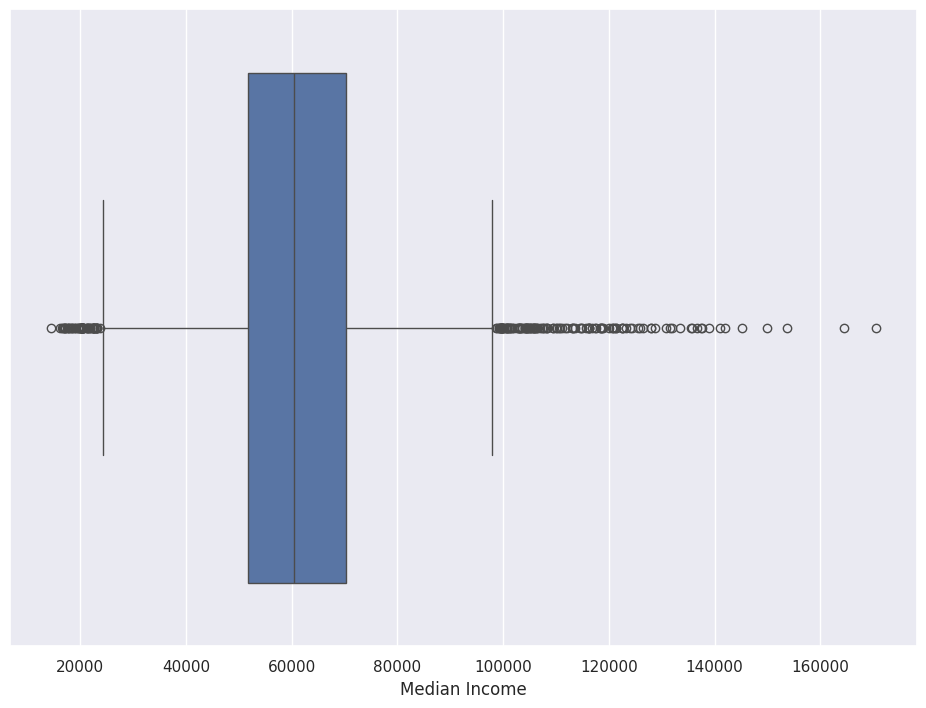

In [ ]:
# Check distribution visually with simple box plot
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = acs_raw, x = "Median Income")

I want to create 5 categories for Median Income: Poverty, Low, Medium, High, and Very High. The median is 60,458, and the official boundary for poverty in the U.S. for a family of 3 is 25,820, according to the Office of the Assistant Secretary for Planning and Education, so that will be the boundary for a 'Poverty' Category. Everything between that and the 25th percentile at 51,814 will be 'Low', from there to the 75th percentile at 70,376 will be 'Medium', up to 100,000 will be 'High', and anything above that will be 'Very High'.

In [ ]:
# Creating income categories
bins = [0, 25820, 51814, 70376, 100000, float("inf")]
labels = ["Poverty", "Low", "Medium", "High", "Very High"]
# Add new category column to acs_raw data
acs_raw['Income Category'] = pd.cut(acs_raw["Median Income"], bins=bins, labels=labels)


In [ ]:
# Display results
acs_raw.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Total Income 25k-35k(%),Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),state,county,Income Category
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,7.0,12.2,16.4,14.5,17.8,6.8,7.4,1,1,Medium
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,8.1,12.1,16.0,14.4,17.0,7.5,9.1,1,3,High
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,11.0,13.2,15.4,8.3,10.9,2.8,3.8,1,5,Low
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,10.5,11.2,17.0,14.8,12.3,3.0,3.5,1,7,Low
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,9.7,14.2,16.4,12.9,15.3,6.4,4.9,1,9,Medium


In [ ]:
# Convert to category
acs_raw['Income Category'] = acs_raw['Income Category'].astype('category')

In [ ]:
acs_raw['Income Category'].dtype

CategoricalDtype(categories=['Poverty', 'Low', 'Medium', 'High', 'Very High'], ordered=True, categories_dtype=object)

In [ ]:
# Should be a good distribution for models to work with
acs_raw['Income Category'].value_counts()

,count
Income Category,
Medium,1610
Low,742
High,690
Very High,116
Poverty,64


The next categorical variable will be based on the number of people with a college or professional degree. First, another box plot is needed.

In [ ]:
# First going to fix typo in education columns
acs_raw = acs_raw.rename(columns = {"Bachelor's Degree":"Bachelors Degree",
                                    "Master's Degree":"Masters Degree",
                                    "Professional School Degree":"Professional Degree"})

In [ ]:
# Create new column based on degree sum
acs_raw['Total Degrees'] = acs_raw[['Bachelors Degree', 'Masters Degree', 'Professional Degree', 'Doctorate']].sum(axis=1)

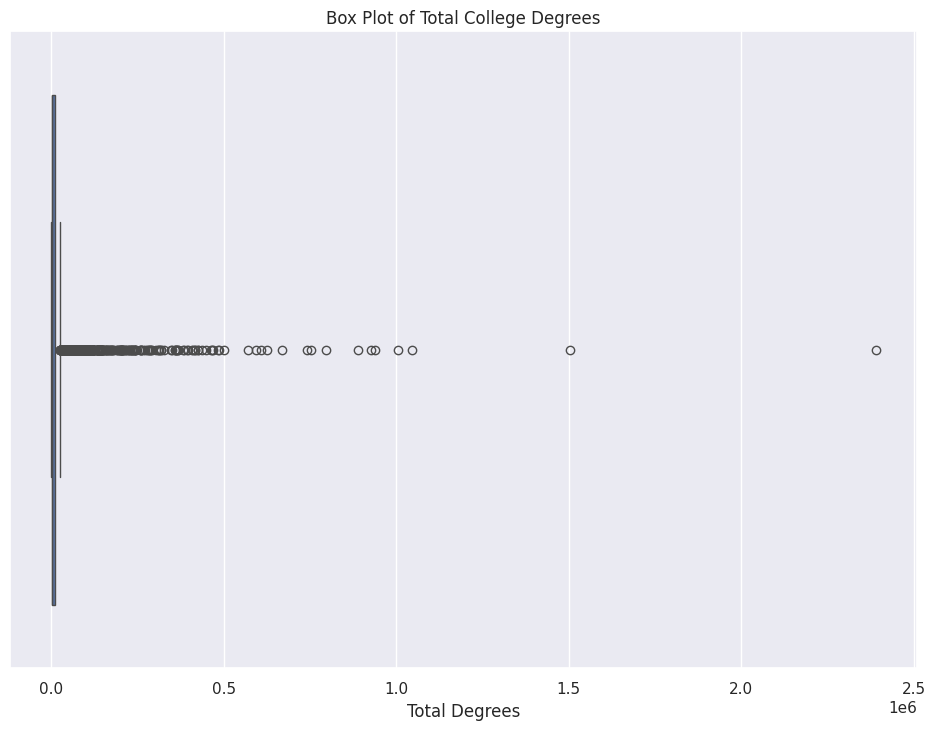

In [ ]:
sns.boxplot(x=acs_raw['Total Degrees'])
plt.title('Box Plot of Total College Degrees')
plt.xlabel('Total Degrees')
plt.show()

In [ ]:
# The skew is likely due to a single county with a high population, probably an urban center.
acs_raw['Total Degrees'].describe()

,Total Degrees
count,3.222000e+03
mean,2.434196e+04
std,8.779323e+04
min,0.000000e+00
25%,1.304250e+03
50%,3.615000e+03
75%,1.139275e+04
max,2.389559e+06


In [ ]:
acs_raw.loc[acs_raw['Total Degrees'] < 100]

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),state,county,Income Category,Total Degrees
95,"Yakutat City and Borough, Alaska",41.3,564,173,12,147,114,12,8,98,...,3.9,31.6,14.3,28.1,7.8,1.7,2,282,High,43
550,"Kalawao County, Hawaii",43.3,50,19,1,9,6,6,0,9,...,0.0,9.4,43.8,9.4,12.5,0.0,15,5,High,17
569,"Clark County, Idaho",37.6,756,474,4,0,0,0,200,78,...,12.4,36.8,5.8,4.3,7.0,0.0,16,33,Medium,76
1430,"Issaquena County, Mississippi",43.1,1206,332,849,0,0,0,12,13,...,0.0,25.3,2.0,6.9,0.5,0.3,28,55,Poverty,54
1634,"Petroleum County, Montana",49.6,416,408,0,0,8,0,0,0,...,19.6,16.4,10.1,19.6,6.9,2.1,30,69,Medium,77
1658,"Arthur County, Nebraska",44.1,485,455,0,1,0,0,1,28,...,11.8,18.5,9.6,18.0,11.2,5.6,31,5,Medium,99
1660,"Blaine County, Nebraska",57.7,384,384,0,0,0,0,0,0,...,19.4,32.3,12.9,4.0,1.0,3.5,31,9,Medium,67
1713,"Loup County, Nebraska",43.4,629,539,0,0,0,0,0,90,...,9.2,17.6,21.7,5.9,1.8,2.9,31,115,Low,90
1714,"McPherson County, Nebraska",56.3,456,449,0,0,0,0,3,4,...,9.3,28.5,19.7,10.4,6.7,2.6,31,117,Medium,59
2371,"Buffalo County, South Dakota",24.0,1859,352,0,1472,0,0,16,19,...,13.8,20.5,11.6,8.7,0.6,1.2,46,17,Low,62
